In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.append(".")

In [2]:
import MLP.preprocessing as pp
import MLP.plottingFunctions as pltf
import MLP.clustering as clt
import MLP.normas as norm

Getting the Iris dataset

In [3]:
from sklearn.datasets import load_iris

iris= load_iris()
data = iris.data

# Normalize data
data = pp.normalize_min_max(data)

## Calculate Distances

In [4]:
# Posibles normas = euclideana, lp, manhattan y cosine
# eculideana = norm.distance_matrix(data, metric = "euclidean")
# lp = norm.distance_matrix(data, metric = "lp", parameter=cualquier real o "inf")
# manhattan = norm.distance_matrix(data, metric = "manhattan")

# Clustering

## Metodo 1
Cajas de Juan

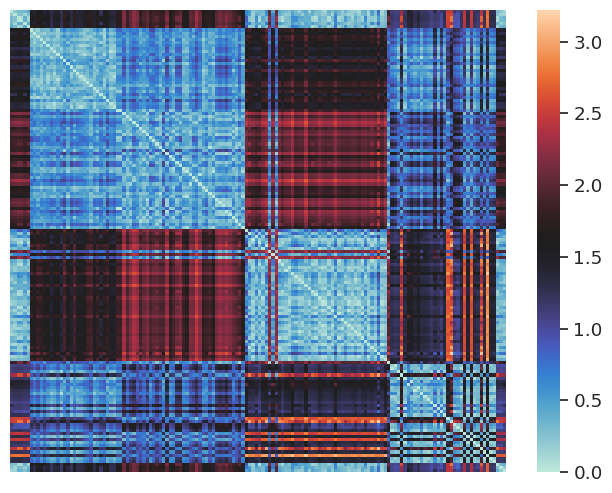

In [35]:
dist = norm.distance_matrix(data, metric="euclidean") # la euclidea funciono mejor en este caso
boxes = clt.boxes(dist, div = 4, sort = "boxes", symmetrical=False) # sort = "boxes" cajas preestablecida, si se elige sort = "distance" se define por la distancia
dist_sorted = norm.sort_dist_matrix_boxes(dist, boxes=boxes)
pltf.plot_heatmap(dist_sorted, cmap = "icefire")

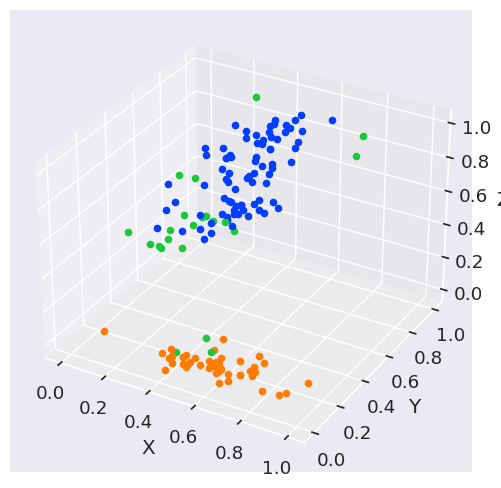

In [36]:
# Creamos los cluster a partir de las cajas
box_clusters = clt.boxes_cluster(dist, 4)

pltf.plot_data_by_clusters_3d(data, box_clusters, "bright", axis=[1,2,3])

## metodo 2
Parecido a DBSCAN

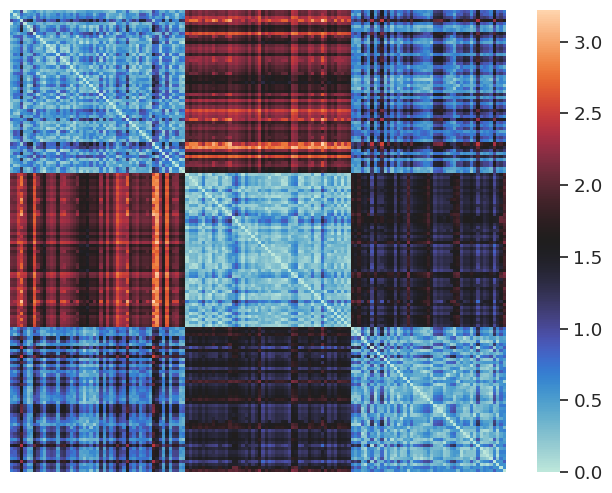

In [15]:
dist = norm.distance_matrix(data, metric="lp", parameter=1) # la lp_1 funciona mejor en este caso
nearby_cluster = clt.nearby_cluster(dist, max_dist = 0.05, max_clusters=3) # Max dist = distancia maxima entre punto y punto, y max_clusters es cuantos cluters se quiere que hayan
pltf.plot_distance_matrix_by_clusters(dist, nearby_cluster, cmap = "icefire")

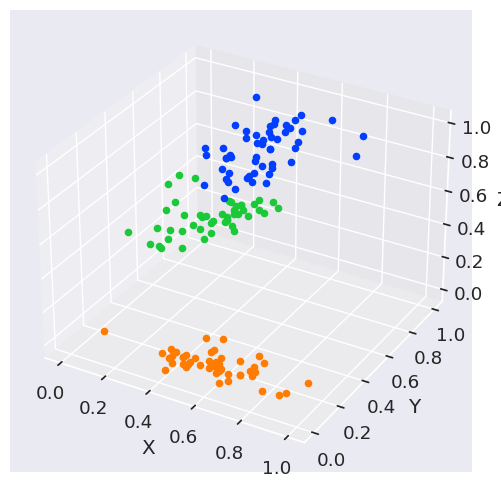

In [16]:
pltf.plot_data_by_clusters_3d(data, nearby_cluster, "bright", axis=[1,2,3])

## Comparacion con los clusters reales

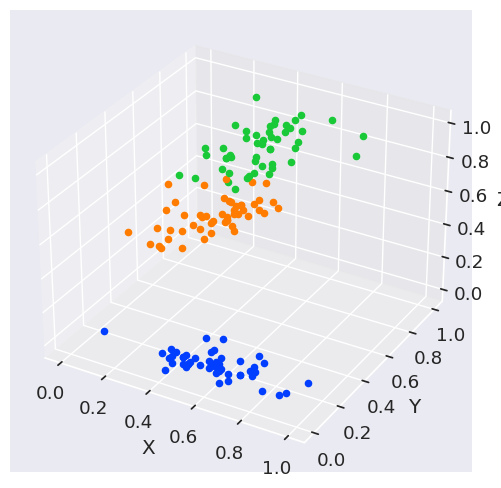

In [28]:
real_clusters = {cluster:[x for x in range(len(data)) if iris.target[x] == cluster] for i,cluster in enumerate(iris.target)}
pltf.plot_data_by_clusters_3d(data, real_clusters, "bright", axis=[1,2,3])